## Descriptive Statistics

i.e. here, I perform an analysis of the zeroshot / fewshot evaluation dataset: what is it made up of? 
That is with regards to:
- with a certain type of quantifier? (all, exists) (is a certain type of quantifier harder?)
- with a certain number of keys? (generally -> or specifically: with a certain number of predicates? / constants?) (is more keys / predicates / constants harder?)
- with a certain number of constants?
- with a certain number of predicates?
- with a certain size of the world model? (is a bigger world model harder?)
- with a certain number of operators? (is more operators harder?)
- with a certain type of operator? (negation, implication, and-operator) -> especially: is there negation in front of quantifiers or not? // using only no operators vs. unary vs. binary operators // (is a certain type of operator harder (none, unary, binary)? is negation in front of quantifiers harder?)
- etc. (e.g. do the models tend to produce tautologies / contradictions?)




In [1]:
import json
import collections
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
filename = 'base_pred_logic_data.json'
base_dataset = pd.read_json('../datasets/' + filename)

In [12]:
# subset:
base_dataset = base_dataset.iloc[0:1000]
len(base_dataset)

1000

#### Descriptive Statistics

In [13]:
satCounts = base_dataset['Satisfied'].value_counts()
satCounts

Satisfied
satisfied      507
unsatisfied    493
Name: count, dtype: int64

In [7]:
# First: show descriptive statistics of evaluation dataset:
# number of quantifiers: all, exists
quantifiersCounts = base_dataset['Quantifiers'].value_counts()
quantifiersCounts


Quantifiers
exists    503
all       497
Name: count, dtype: int64

In [14]:
# distribution of predicates
predicatesCounts = base_dataset['Predicates'].value_counts() # then add the singular F and G to one line
predicatesCounts

Predicates
[G, F]    448
[F]       285
[G]       267
Name: count, dtype: int64

In [15]:
# distribution of constants 
oldConstants = base_dataset['Names']
constants = []
for con in oldConstants:
    constants.append(len(con))
constantsCounts = collections.Counter(constants) # the keys() is what is counted, and the values() is the count
constantsCounts

Counter({8: 101,
         10: 112,
         9: 116,
         2: 66,
         4: 105,
         3: 104,
         7: 110,
         6: 127,
         5: 123,
         1: 36})

<Axes: xlabel='Number_of_constants'>

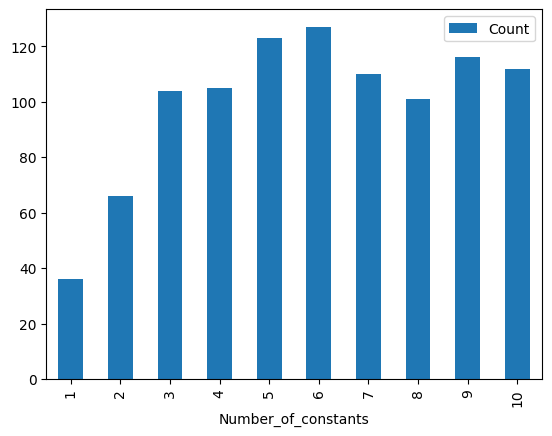

In [16]:
temp = pd.DataFrame(list(zip(constantsCounts.keys(), constantsCounts.values())), columns=['Number_of_constants','Count']).sort_values('Number_of_constants')
temp.plot(kind="bar", x = "Number_of_constants")

In [17]:
# distribution of keys
keys_list = base_dataset['Keys']
keysTemp = []
for keys in keys_list:
    keysTemp.append(keys.count(':'))
keysCounts = collections.Counter(keysTemp)
keysCounts

Counter({9: 99,
         11: 121,
         10: 111,
         3: 46,
         5: 116,
         4: 87,
         8: 134,
         7: 111,
         6: 105,
         12: 45,
         2: 25})

<Axes: xlabel='Number_of_keys'>

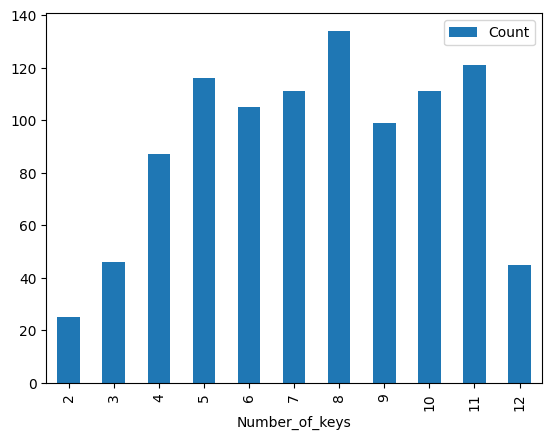

In [18]:
temp = pd.DataFrame(list(zip(keysCounts.keys(), keysCounts.values())), columns=['Number_of_keys','Count']).sort_values('Number_of_keys')
temp.plot(kind="bar", x = "Number_of_keys")

In [19]:
# distribution of world model size
worldModel_list = base_dataset['World Model']
wmTemp = []
for wm in worldModel_list:
    wmTemp.append(wm.count('.'))
worldModelCounts = collections.Counter(wmTemp)
worldModelCounts

Counter({8: 89,
         10: 122,
         9: 62,
         2: 46,
         4: 99,
         3: 56,
         7: 63,
         6: 104,
         5: 68,
         18: 54,
         12: 71,
         14: 47,
         16: 49,
         20: 45,
         1: 25})

<Axes: xlabel='Number_of_Sentences'>

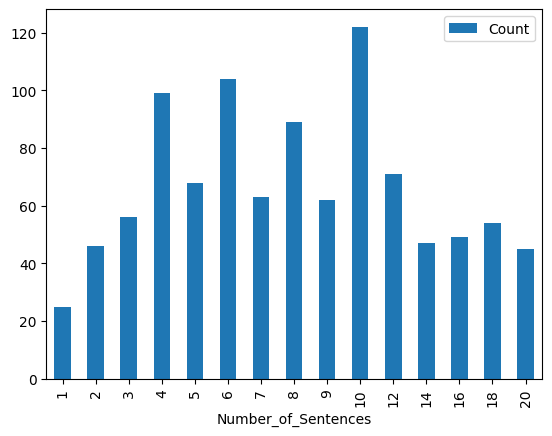

In [20]:
temp = pd.DataFrame(list(zip(worldModelCounts.keys(), worldModelCounts.values())), columns=['Number_of_Sentences','Count']).sort_values('Number_of_Sentences')
temp.plot(kind="bar", x = "Number_of_Sentences")

In [21]:
# generally: count all negations, implications, and-operators individually for each formula (string-find-count).
# from this deduce another list: total number of operators => plot this count. (is more operators harder?)
numNegations = []
numImplications = []
numAnds = []

formula_list = base_dataset['Formula']
for formula in formula_list:
    numNegations.append(formula.count("-"))
    numImplications.append(formula.count(">"))
    numAnds.append(formula.count("&"))

numTotalOperators = [a + b + c for (a, b, c) in zip(numNegations,numImplications,numAnds)]

In [22]:
negationCounts = collections.Counter(numNegations)
negationCounts

Counter({0: 48, 1: 186, 2: 320, 3: 280, 4: 140, 5: 26})

<Axes: xlabel='Number_of_Negations'>

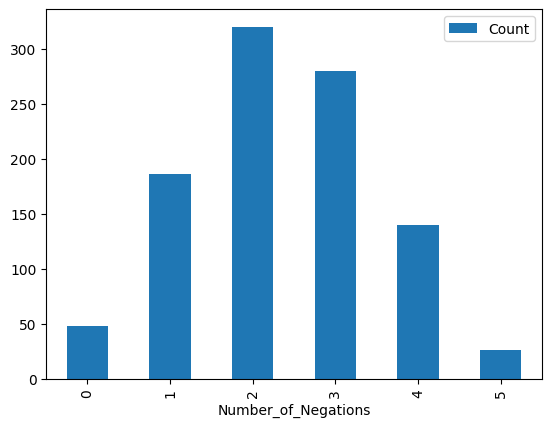

In [23]:
temp = pd.DataFrame(list(zip(negationCounts.keys(), negationCounts.values())), columns=['Number_of_Negations','Count']).sort_values('Number_of_Negations')
temp.plot(kind="bar", x = "Number_of_Negations")

In [24]:
implicationCounts = collections.Counter(numImplications)
implicationCounts

Counter({0: 543, 1: 457})

In [25]:
andCounts = collections.Counter(numAnds)
andCounts

Counter({0: 530, 1: 470})

In [26]:
totalOperatorCounts = collections.Counter(numTotalOperators)
totalOperatorCounts

Counter({0: 17, 1: 69, 2: 166, 3: 302, 4: 280, 5: 140, 6: 26})

<Axes: xlabel='Number_of_Operators'>

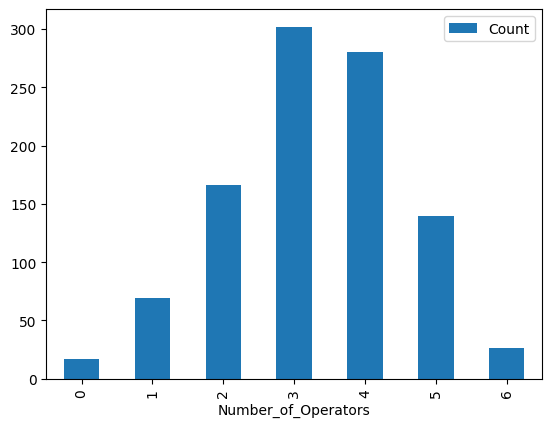

In [27]:
temp = pd.DataFrame(list(zip(totalOperatorCounts.keys(), totalOperatorCounts.values())), columns=['Number_of_Operators','Count']).sort_values('Number_of_Operators')
temp.plot(kind="bar", x = "Number_of_Operators")

In [28]:
# how many times there is negation in front of quantifiers vs. not (is negation in front of quantifiers harder?)
numNegationInFront = []
for formula in formula_list:
    if formula[0] == "-":
        numNegationInFront.append(True)
    else:
        numNegationInFront.append(False)
negationInFrontCounts = collections.Counter(numNegationInFront)
negationInFrontCounts

Counter({False: 503, True: 497})

In [29]:
# unary is negationCounts > 0 und implicationCounts == 0 und andCounts == 0.
# binary is negationCounts == 0 und implicationCounts > 0 oder andCounts > 0.
# unary + binary == 
unaryOperators = []
binaryOperators = []
unaryBinaryOperators = []
for nega, impl, andop in zip(numNegations, numImplications, numAnds):
    if nega > 0:
        binaryOperators.append(False)
        if impl == 0 and andop == 0:
            unaryOperators.append(True)
            unaryBinaryOperators.append(False)
        else:
            unaryOperators.append(False)
            unaryBinaryOperators.append(True)
    else:
        binaryOperators.append(True)
        unaryBinaryOperators.append(False)
        unaryOperators.append(False)

In [30]:
unaryOperatorsCounts = collections.Counter(unaryOperators)
unaryOperatorsCounts

Counter({False: 944, True: 56})

In [31]:
binaryOperatorsCounts = collections.Counter(binaryOperators)
binaryOperatorsCounts

Counter({True: 48, False: 952})

In [32]:
unaryBinaryOperatorsCounts = collections.Counter(unaryBinaryOperators)
unaryBinaryOperatorsCounts

Counter({False: 104, True: 896})

### Tautologies / Contradictions

In [47]:
import nltk
from nltk.inference.prover9 import BaseProverCommand, Prover, Prover9Command
from nltk.sem import Expression
from nltk.sem.logic import (
    AllExpression,
    AndExpression,
    EqualityExpression,
    ExistsExpression,
    Expression,
    IffExpression,
    ImpExpression,
    NegatedExpression,
    OrExpression,
)
from nltk import *
from nltk.sem.drt import DrtParser
from nltk.sem import logic

In [48]:
# a formula without assumptions is generally false (instead of undefined) for ResolutionProver.
# Tested the functions below so that tautologies are recognised, contradictions as well, but not other formulas (which are neither contradictions or tautologies).

In [78]:
def is_tautology(expression):
    # needs to be true, regardless of the input.
    # needs to be false when negated, regardless of the input.
    if ResolutionProver().prove(expression, [], verbose=True) and not ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [79]:
def is_contradiction(expression):
    # needs to be false, regardless of the input.
    # needs to be true when negated, regardless of the input.
    if not ResolutionProver().prove(expression, [], verbose=True) and ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [59]:
read_expr = Expression.fromstring

In [76]:
formula = read_expr(base_dataset["Formula"].iloc[20])
#formula = NegatedExpression(formula) # negating a contradiction makes it a tautology.
formula

<NegatedExpression -all x.-(F(x) -> F(x))>

In [77]:
res = ResolutionProver().prove(formula, [], verbose=True)
res

[1] {F(z17)}   A 
[2] {-F(z18)}  A 
[3] {}         (1, 2) 



True

Descriptive Statistics regarding tautologies

In [ ]:
numTautologies = []
numContradictions = []
for i in range(len(base_dataset)):
    formula = base_dataset['Formula'].iloc[i]
    numTautologies.append(is_tautology(read_expr(formula)))
    numContradictions.append(is_contradiction(read_expr(formula)))

In [81]:
numTautologies = collections.Counter(numTautologies)
numTautologies

Counter({False: 877, True: 123})

In [82]:
numContradictions = collections.Counter(numContradictions)
numContradictions

Counter({False: 880, True: 120})